# <span style='background:Brown ; color:White' > CREDITWORTHINESS PROJECT  </span>

## **Project Objective:**
This project is seeking to identify creditworthy and non-creditworthy customers from the given dataset. 



## **Solution:** 
To use the credit data to build a model that predicts whether a customer is creditworthy or non-creditworthy 

**Outline:**

    1. Importing all necessary libraries
    2. Loading Data
    3. Exploratory Data Analysis
        a.Data Cleaning
        b.Feature Engineering
    4. Prepare Data For Modelling
    5. Modelling
    6. Creteria and Metrics for Model Selection
    7. Model Selection
    8. Conclusion
   
   

## Importing the Necessary Libraries

In [2]:
#Importing key libraries to start with.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from bioinfokit.analys import stat

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

#Importing chi-square library
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#Importing model related libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#Importing models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

## Loading Data...

In [3]:
data = pd.read_excel('credit-data-training.xlsx') #this loads the data into the notebook to work with.
data.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


## Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Credit-Application-Result          500 non-null    object 
 1   Account-Balance                    500 non-null    object 
 2   Duration-of-Credit-Month           500 non-null    int64  
 3   Payment-Status-of-Previous-Credit  500 non-null    object 
 4   Purpose                            500 non-null    object 
 5   Credit-Amount                      500 non-null    int64  
 6   Value-Savings-Stocks               500 non-null    object 
 7   Length-of-current-employment       500 non-null    object 
 8   Instalment-per-cent                500 non-null    int64  
 9   Guarantors                         500 non-null    object 
 10  Duration-in-Current-address        156 non-null    float64
 11  Most-valuable-available-asset      500 non-null    int64  

Checking for brief information about the dataset

### Checking the Data for Missing Values

In [5]:
data.isna().sum()

Credit-Application-Result              0
Account-Balance                        0
Duration-of-Credit-Month               0
Payment-Status-of-Previous-Credit      0
Purpose                                0
Credit-Amount                          0
Value-Savings-Stocks                   0
Length-of-current-employment           0
Instalment-per-cent                    0
Guarantors                             0
Duration-in-Current-address          344
Most-valuable-available-asset          0
Age-years                             12
Concurrent-Credits                     0
Type-of-apartment                      0
No-of-Credits-at-this-Bank             0
Occupation                             0
No-of-dependents                       0
Telephone                              0
Foreign-Worker                         0
dtype: int64

From the output above, only two variables (Duration-in-Current-address and Age-years) have missing values and they will be resolved later.

### Splitting the data into categorical and numerical variables
This is done to make it easier to understand and clean the data.

In [6]:
numerical = data.select_dtypes(include= np.number)
categorical = data.select_dtypes(include = 'object')

In [7]:
numerical.head(10)    #first 10 records of the numerical variables

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,4,1494,1,2.0,1,NaN,2,1,2,1,2
1,4,1494,1,2.0,1,29.0,2,1,2,1,2
2,4,1544,2,1.0,1,42.0,2,1,2,1,1
3,4,3380,1,1.0,1,37.0,2,1,2,1,1
4,6,343,4,1.0,1,27.0,2,1,1,1,1
5,6,362,4,NaN,3,52.0,2,1,1,1,1
6,6,433,4,NaN,2,24.0,1,1,2,1,1
7,6,454,3,NaN,2,22.0,2,1,1,1,1
8,6,484,3,3.0,1,28.0,2,1,1,1,1
9,6,660,2,4.0,1,23.0,1,1,1,1,1


In [8]:
categorical.head(10)

,Credit-Application-Result,Account-Balance,Payment-Status-of-Previous-Credit,Purpose,Value-Savings-Stocks,Length-of-current-employment,Guarantors,Concurrent-Credits,No-of-Credits-at-this-Bank
0,Creditworthy,Some Balance,Paid Up,Other,£100-£1000,< 1yr,None,Other Banks/Depts,1
1,Creditworthy,Some Balance,Paid Up,Home Related,£100-£1000,< 1yr,None,Other Banks/Depts,1
2,Creditworthy,Some Balance,No Problems (in this bank),Home Related,None,1-4 yrs,None,Other Banks/Depts,More than 1
3,Creditworthy,Some Balance,No Problems (in this bank),Home Related,None,1-4 yrs,None,Other Banks/Depts,1
4,Creditworthy,No Account,Paid Up,Home Related,None,< 1yr,None,Other Banks/Depts,1
5,Creditworthy,Some Balance,No Problems (in this bank),Home Related,< £100,< 1yr,None,Other Banks/Depts,More than 1
6,Non-Creditworthy,No Account,Some Problems,Home Related,£100-£1000,< 1yr,None,Other Banks/Depts,1
7,Creditworthy,No Account,Paid Up,Home Related,None,< 1yr,None,Other Banks/Depts,1
8,Creditworthy,No Account,Paid Up,Home Related,None,1-4 yrs,Yes,Other Banks/Depts,1
9,Creditworthy,Some Balance,Paid Up,Home Related,£100-£1000,1-4 yrs,None,Other Banks/Depts,1


### Creating a Function to Explore the Categorical Variables

In [9]:
def check_cat(df, x):
    """
    Displays a summary of the variable (column, x) including the number of unique values, describe the variable, 
    the value counts and whether there are missing values in the variable(column) 
    
    INPUT:
    Name of dataframe, variable(column) name.
    
    OUTPUT: 
    Returns the summary as defined above
    
    """
    print('Summary: ')
    print('******************************************************************************************')
    print(df[x].describe(), '\n')
    sns.countplot(df[x])
    plt.show()
    print('******************************************************************************************')
    print('Value Counts: \n')
    print(df[x].value_counts(), '\n')
    print('******************************************************************************************')
    print('Missing Values: {}'.format(df[x].isna().sum()))
    

In [10]:
for col in categorical.columns:  #displaying the categorical columns to use with the function
    print(col)

Credit-Application-Result
Account-Balance
Payment-Status-of-Previous-Credit
Purpose
Value-Savings-Stocks
Length-of-current-employment
Guarantors
Concurrent-Credits
No-of-Credits-at-this-Bank


### Calling the Function on Each of the Categorical Variables

Summary: 
******************************************************************************************
count              500
unique               2
top       Creditworthy
freq               358
Name: Credit-Application-Result, dtype: object 



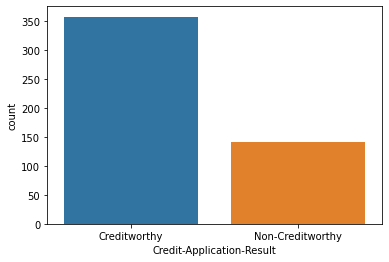

******************************************************************************************
Value Counts: 

Creditworthy        358
Non-Creditworthy    142
Name: Credit-Application-Result, dtype: int64 

******************************************************************************************
Missing Values: 0


In [11]:
check_cat(data, 'Credit-Application-Result')

The exploration above shows that the target variable is imbalance because the creditworthy values far outweighs
that of the non-creditworthy values.

Summary: 
******************************************************************************************
count            500
unique             2
top       No Account
freq             262
Name: Account-Balance, dtype: object 



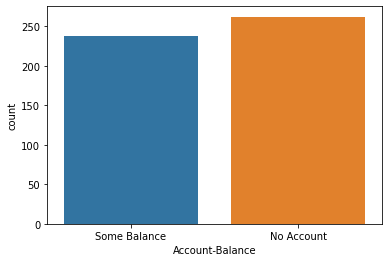

******************************************************************************************
Value Counts: 

No Account      262
Some Balance    238
Name: Account-Balance, dtype: int64 

******************************************************************************************
Missing Values: 0


In [12]:
check_cat(data, 'Account-Balance')

This variable has no distribution issue and will be used later in the modelling 

Summary: 
******************************************************************************************
count         500
unique          3
top       Paid Up
freq          260
Name: Payment-Status-of-Previous-Credit, dtype: object 



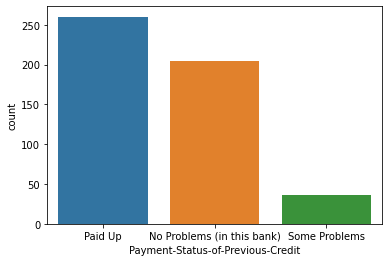

******************************************************************************************
Value Counts: 

Paid Up                       260
No Problems (in this bank)    204
Some Problems                  36
Name: Payment-Status-of-Previous-Credit, dtype: int64 

******************************************************************************************
Missing Values: 0


In [13]:
check_cat(data, 'Payment-Status-of-Previous-Credit')

This variable also has no issue hence will be used later in the modelling 

Summary: 
******************************************************************************************
count              500
unique               4
top       Home Related
freq               355
Name: Purpose, dtype: object 



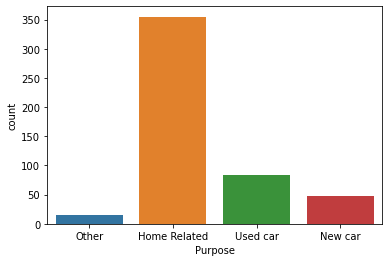

******************************************************************************************
Value Counts: 

Home Related    355
Used car         83
New car          47
Other            15
Name: Purpose, dtype: int64 

******************************************************************************************
Missing Values: 0


In [14]:
check_cat(data, 'Purpose')

In [15]:
#Re-engeneering purpose values to only contain 2 values: Home Related and Not Home Related
data['Purpose']=data['Purpose'].replace({'New car':'Not Home Related','Used car':'Not Home Related','Other':'Not Home Related'})

Summary: 
******************************************************************************************
count      500
unique       3
top       None
freq       298
Name: Value-Savings-Stocks, dtype: object 



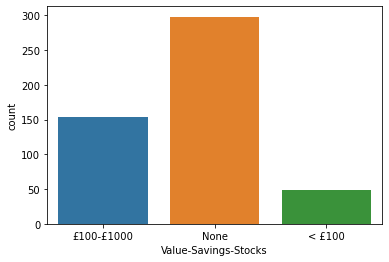

******************************************************************************************
Value Counts: 

None          298
£100-£1000    154
< £100         48
Name: Value-Savings-Stocks, dtype: int64 

******************************************************************************************
Missing Values: 0


In [16]:
check_cat(data, 'Value-Savings-Stocks')

Summary: 
******************************************************************************************
count       500
unique        3
top       < 1yr
freq        279
Name: Length-of-current-employment, dtype: object 



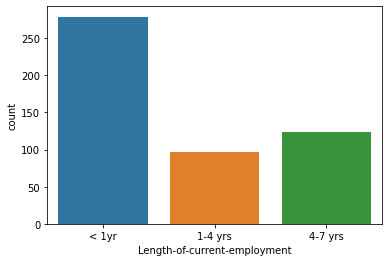

******************************************************************************************
Value Counts: 

< 1yr      279
4-7 yrs    124
1-4 yrs     97
Name: Length-of-current-employment, dtype: int64 

******************************************************************************************
Missing Values: 0


In [17]:
check_cat(data, 'Length-of-current-employment')

Summary: 
******************************************************************************************
count      500
unique       2
top       None
freq       457
Name: Guarantors, dtype: object 



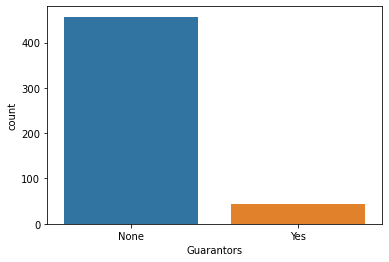

******************************************************************************************
Value Counts: 

None    457
Yes      43
Name: Guarantors, dtype: int64 

******************************************************************************************
Missing Values: 0


In [18]:
check_cat(data, 'Guarantors')

This variable is heavily imbalanced and may be dropped if it has low correlation with the target variable.

Summary: 
******************************************************************************************
count                   500
unique                    1
top       Other Banks/Depts
freq                    500
Name: Concurrent-Credits, dtype: object 



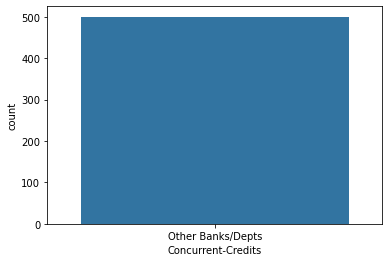

******************************************************************************************
Value Counts: 

Other Banks/Depts    500
Name: Concurrent-Credits, dtype: int64 

******************************************************************************************
Missing Values: 0


In [19]:
check_cat(data, 'Concurrent-Credits')

This variable has low variability. Hence it will be dropped.  

Summary: 
******************************************************************************************
count     500
unique      2
top         1
freq      320
Name: No-of-Credits-at-this-Bank, dtype: object 



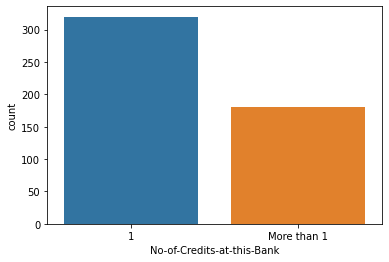

******************************************************************************************
Value Counts: 

1              320
More than 1    180
Name: No-of-Credits-at-this-Bank, dtype: int64 

******************************************************************************************
Missing Values: 0


In [20]:
check_cat(data, 'No-of-Credits-at-this-Bank')

### Using Chi_Square to Find Relationships Among Categorical Variables

In [21]:
def chi_square(df, x, y):
    table = pd.crosstab(df[x], df[y])
    test = stat()
    test.chisq(df=table)
    #add docstring
    
    print('Null hypothesis: {} and {} are Independent'.format(x,y))
    print('Alternative hypothesis: {} and {} are Dependent'.format(x,y))
    print('Test results')
    print('*'*60)
    print('Observed frequency values \n')
    print(table)
    
    print('*'*60)
    print(test.expected_df)
    print('*'*60)
    print(test.summary)

In [22]:
chi_square(data, 'Account-Balance', 'Credit-Application-Result' )

Null hypothesis: Account-Balance and Credit-Application-Result are Independent
Alternative hypothesis: Account-Balance and Credit-Application-Result are Dependent
Test results
************************************************************
Observed frequency values 

Credit-Application-Result  Creditworthy  Non-Creditworthy
Account-Balance                                          
No Account                          152               110
Some Balance                        206                32
************************************************************

Expected frequency counts

      Creditworthy    Non-Creditworthy
--  --------------  ------------------
 0         187.592              74.408
 1         170.408              67.592

************************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       48.5598  3.20374e-12
Log-likelihood  

The correlation between Account-Balance and Credit-Application-Result is 3.20374e-12. Compared to the P-value of 0.05, the correlation value is less. Hence, Account-Balance and Credit-Application-Result are dependent and it will be used in the model.

In [23]:
chi_square(data, 'Payment-Status-of-Previous-Credit', 'Credit-Application-Result' ) 

Null hypothesis: Payment-Status-of-Previous-Credit and Credit-Application-Result are Independent
Alternative hypothesis: Payment-Status-of-Previous-Credit and Credit-Application-Result are Dependent
Test results
************************************************************
Observed frequency values 

Credit-Application-Result          Creditworthy  Non-Creditworthy
Payment-Status-of-Previous-Credit                                
No Problems (in this bank)                  162                42
Paid Up                                     185                75
Some Problems                                11                25
************************************************************

Expected frequency counts

      Creditworthy    Non-Creditworthy
--  --------------  ------------------
 0         146.064              57.936
 1         186.16               73.84
 2          25.776              10.224

************************************************************

Chi-squared test for in

The correlation between Payment-Status-of-Previous-Credit and Credit-Application-Result is 1.54411e-08. Compared to the P-value of 0.05, the correlation value is less. Hence, Payment-Status-of-Previous-Credit and Credit-Application-Result are dependent and it will be used in the model.

In [24]:
chi_square(data, 'Purpose', 'Credit-Application-Result' )

Null hypothesis: Purpose and Credit-Application-Result are Independent
Alternative hypothesis: Purpose and Credit-Application-Result are Dependent
Test results
************************************************************
Observed frequency values 

Credit-Application-Result  Creditworthy  Non-Creditworthy
Purpose                                                  
Home Related                        244               111
Not Home Related                    114                31
************************************************************

Expected frequency counts

      Creditworthy    Non-Creditworthy
--  --------------  ------------------
 0          254.18              100.82
 1          103.82               41.18

************************************************************

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1       4.47603  0.0343735
Log-likelihood     1       4.62836  0.

The correlation between Purpose and Credit-Application-Result is 0.0343735. Compared to 
the P-value of 0.05, the correlation value is less. Hence, Purpose and Credit-Application-Result 
are dependent and it will be used in the model.

In [25]:
chi_square(data, 'Value-Savings-Stocks', 'Credit-Application-Result' )

Null hypothesis: Value-Savings-Stocks and Credit-Application-Result are Independent
Alternative hypothesis: Value-Savings-Stocks and Credit-Application-Result are Dependent
Test results
************************************************************
Observed frequency values 

Credit-Application-Result  Creditworthy  Non-Creditworthy
Value-Savings-Stocks                                     
< £100                               36                12
None                                195               103
£100-£1000                          127                27
************************************************************

Expected frequency counts

      Creditworthy    Non-Creditworthy
--  --------------  ------------------
 0          34.368              13.632
 1         213.368              84.632
 2         110.264              43.736

************************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
-----

The correlation between Value-Savings-Stocks and Credit-Application-Result is 0.00061586. Compared to the P-value of 0.05, 
the correlation value is less. Hence, Value-Savings-Stocks and Credit-Application-Result are dependent and it will be used 
in the model.



In [26]:
chi_square(data, 'Length-of-current-employment', 'Credit-Application-Result' )

Null hypothesis: Length-of-current-employment and Credit-Application-Result are Independent
Alternative hypothesis: Length-of-current-employment and Credit-Application-Result are Dependent
Test results
************************************************************
Observed frequency values 

Credit-Application-Result     Creditworthy  Non-Creditworthy
Length-of-current-employment                                
1-4 yrs                                 76                21
4-7 yrs                                 94                30
< 1yr                                  188                91
************************************************************

Expected frequency counts

      Creditworthy    Non-Creditworthy
--  --------------  ------------------
 0          69.452              27.548
 1          88.784              35.216
 2         199.764              79.236

************************************************************

Chi-squared test for independence

Test              Df  

The correlation between Length-of-current-employment and Credit-Application-Result is 0.0580725. Compared to the P-value of 0.05, 
the correlation value is equal. Hence, Value-Savings-Stocks and Credit-Application-Result are dependent and it will be used 
in the model.

In [27]:
chi_square(data, 'Guarantors', 'Credit-Application-Result' )

Null hypothesis: Guarantors and Credit-Application-Result are Independent
Alternative hypothesis: Guarantors and Credit-Application-Result are Dependent
Test results
************************************************************
Observed frequency values 

Credit-Application-Result  Creditworthy  Non-Creditworthy
Guarantors                                               
None                                330               127
Yes                                  28                15
************************************************************

Expected frequency counts

      Creditworthy    Non-Creditworthy
--  --------------  ------------------
 0         327.212             129.788
 1          30.788              12.212

************************************************************

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1      0.655037   0.418317
Log-likelihood     1      0.6351

The correlation between Guarantors and Credit-Application-Result is 0.418317. Compared to the P-value 
of 0.05, the correlation value is higher. Hence, Guarantors and Credit-Application-Result are independent and 
it will be dropped. 

In [28]:
chi_square(data, 'Concurrent-Credits', 'Credit-Application-Result')

Null hypothesis: Concurrent-Credits and Credit-Application-Result are Independent
Alternative hypothesis: Concurrent-Credits and Credit-Application-Result are Dependent
Test results
************************************************************
Observed frequency values 

Credit-Application-Result  Creditworthy  Non-Creditworthy
Concurrent-Credits                                       
Other Banks/Depts                   358               142
************************************************************

Expected frequency counts

      Creditworthy    Non-Creditworthy
--  --------------  ------------------
 0             358                 142

************************************************************

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            0             0          1
Log-likelihood     0             0          1



The correlation between Concurrent-Credits and Credit-Application-Result is 1. Compared to the P-value of 0.05, 
the correlation value is higher. Hence, Concurrent-Credits and Credit-Application-Result are absolutely independent and 
it will be dropped. 

In [29]:
chi_square(data, 'No-of-Credits-at-this-Bank', 'Credit-Application-Result')

Null hypothesis: No-of-Credits-at-this-Bank and Credit-Application-Result are Independent
Alternative hypothesis: No-of-Credits-at-this-Bank and Credit-Application-Result are Dependent
Test results
************************************************************
Observed frequency values 

Credit-Application-Result   Creditworthy  Non-Creditworthy
No-of-Credits-at-this-Bank                                
1                                    223                97
More than 1                          135                45
************************************************************

Expected frequency counts

      Creditworthy    Non-Creditworthy
--  --------------  ------------------
 0          229.12               90.88
 1          128.88               51.12

************************************************************

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1       1.34831   0.245

The correlation between Concurrent-Credits and Credit-Application-Result is 0.245574. Compared to the P-value of 0.05, 
the correlation value is higher. Hence, Concurrent-Credits and Credit-Application-Result are independent and may be dropped.

### Creating a Function to Explore the Numerical Variables

In [30]:
def check_num(df, x):
    print('Summary Statistics \n')
    print(df[x].apply([len, min, max, np.median, np.mean, np.std]))
    print('*'*60)
    print('Missing Values: {}'.format(df[x].isna().sum()))
    print('*'*60)
    plt.figure(figsize = (8, 4))
    sns.distplot(df[x], color = 'b')
    plt.show()

In [31]:
numerical.columns

Index(['Duration-of-Credit-Month', 'Credit-Amount', 'Instalment-per-cent',
       'Duration-in-Current-address', 'Most-valuable-available-asset',
       'Age-years', 'Type-of-apartment', 'Occupation', 'No-of-dependents',
       'Telephone', 'Foreign-Worker'],
      dtype='object')

Summary Statistics 

len       500.00000
min         4.00000
max        60.00000
median     18.00000
mean       21.43400
std        12.30742
Name: Duration-of-Credit-Month, dtype: float64
************************************************************
Missing Values: 0
************************************************************


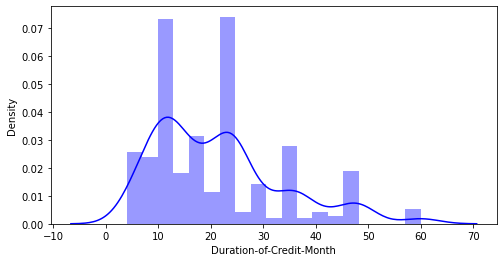

In [32]:
check_num(data, 'Duration-of-Credit-Month')

Summary Statistics 

len         500.000000
min         276.000000
max       18424.000000
median     2236.500000
mean       3199.980000
std        2831.386861
Name: Credit-Amount, dtype: float64
************************************************************
Missing Values: 0
************************************************************


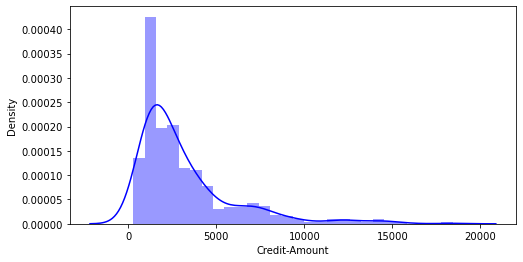

In [33]:
check_num(data, 'Credit-Amount')

Summary Statistics 

len       500.000000
min         1.000000
max         4.000000
median      3.000000
mean        3.010000
std         1.113724
Name: Instalment-per-cent, dtype: float64
************************************************************
Missing Values: 0
************************************************************


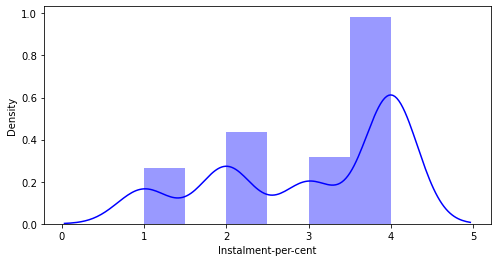

In [34]:
check_num(data, 'Instalment-per-cent')

Summary Statistics 

len       500.000000
min         1.000000
max         4.000000
median      2.000000
mean        2.660256
std         1.150017
Name: Duration-in-Current-address, dtype: float64
************************************************************
Missing Values: 344
************************************************************


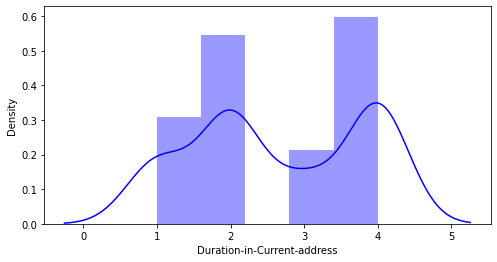

In [35]:
check_num(data, 'Duration-in-Current-address')

Summary Statistics 

len       500.000000
min         1.000000
max         4.000000
median      3.000000
mean        2.360000
std         1.064268
Name: Most-valuable-available-asset, dtype: float64
************************************************************
Missing Values: 0
************************************************************


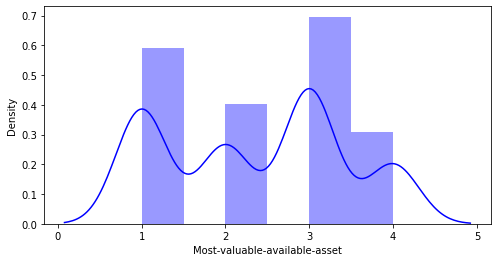

In [36]:
check_num(data, 'Most-valuable-available-asset')

Summary Statistics 

len       500.000000
min        19.000000
max        75.000000
median     33.000000
mean       35.637295
std        11.501522
Name: Age-years, dtype: float64
************************************************************
Missing Values: 12
************************************************************


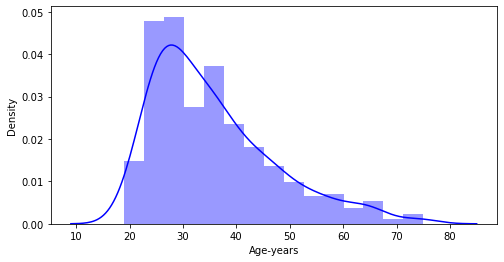

In [37]:
check_num(data, 'Age-years')

Summary Statistics 

len       500.000000
min         1.000000
max         3.000000
median      2.000000
mean        1.928000
std         0.539814
Name: Type-of-apartment, dtype: float64
************************************************************
Missing Values: 0
************************************************************


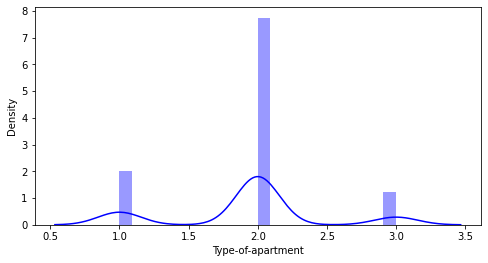

In [38]:
check_num(data, 'Type-of-apartment')

Summary Statistics 

len       500.00000
min         1.00000
max         2.00000
median      1.00000
mean        1.14600
std         0.35346
Name: No-of-dependents, dtype: float64
************************************************************
Missing Values: 0
************************************************************


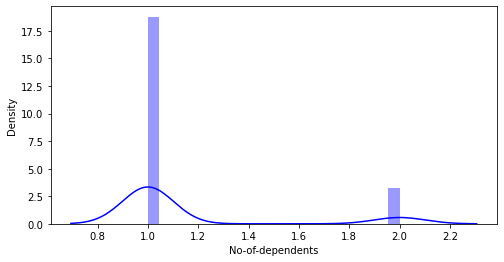

In [39]:
check_num(data, 'No-of-dependents')

Summary Statistics 

len       500.000000
min         1.000000
max         2.000000
median      1.000000
mean        1.400000
std         0.490389
Name: Telephone, dtype: float64
************************************************************
Missing Values: 0
************************************************************


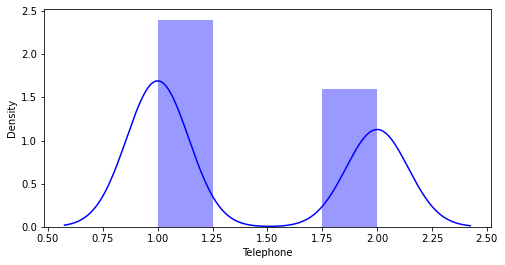

In [40]:
check_num(data, 'Telephone')

Summary Statistics 

len       500.0
min         1.0
max         1.0
median      1.0
mean        1.0
std         0.0
Name: Occupation, dtype: float64
************************************************************
Missing Values: 0
************************************************************


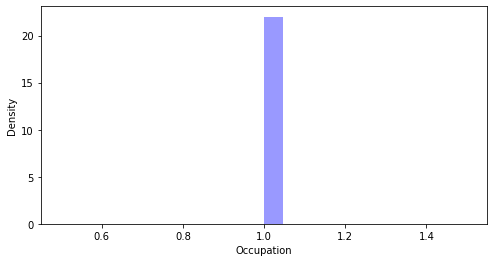

In [41]:
check_num(data, 'Occupation')

Summary Statistics 

len       500.000000
min         1.000000
max         2.000000
median      1.000000
mean        1.038000
std         0.191388
Name: Foreign-Worker, dtype: float64
************************************************************
Missing Values: 0
************************************************************


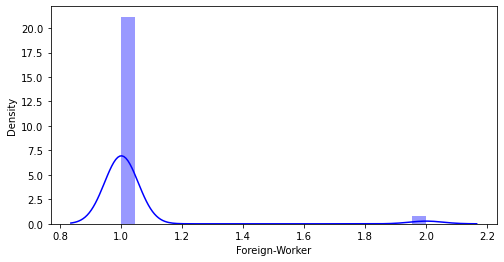

In [42]:
check_num(data, 'Foreign-Worker')

### Correlation Between Numerical Values


Relationship between variables are inspected using pairpot. This will inform us about which predictor variables are highly correlated or not.

<AxesSubplot:>

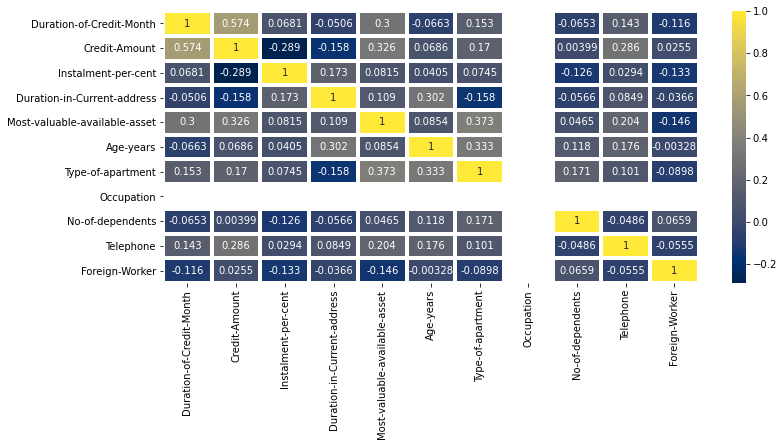

In [43]:
corrMatrix=numerical.corr()
plt.figure(figsize=(12,5))
sns.heatmap(data=corrMatrix,annot=True,fmt='.3g',linewidths=3, cmap = 'cividis') 

From the heatmap above, Occupaton, Telephone, Foreign-Worker and No-of-dependents may be dropped

Filling in the Missing Values for the Age-years variable using the Median age.

In [44]:
data['Age-years'].fillna(np.round(data['Age-years'].median(), 0), inplace=True)
data.isnull().sum()

Credit-Application-Result              0
Account-Balance                        0
Duration-of-Credit-Month               0
Payment-Status-of-Previous-Credit      0
Purpose                                0
Credit-Amount                          0
Value-Savings-Stocks                   0
Length-of-current-employment           0
Instalment-per-cent                    0
Guarantors                             0
Duration-in-Current-address          344
Most-valuable-available-asset          0
Age-years                              0
Concurrent-Credits                     0
Type-of-apartment                      0
No-of-Credits-at-this-Bank             0
Occupation                             0
No-of-dependents                       0
Telephone                              0
Foreign-Worker                         0
dtype: int64

### Dropping Redundant variables

In [45]:
data.drop(['Foreign-Worker', 'Concurrent-Credits','Telephone','Duration-in-Current-address', 
           'Guarantors', 'Occupation','No-of-dependents'], axis=1, inplace=True)  

In [46]:
data.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,Creditworthy,Some Balance,4,Paid Up,Not Home Related,1494,£100-£1000,< 1yr,1,1,33.0,2,1
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,1,42.0,2,More than 1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,1,37.0,2,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,1,27.0,2,1


In [47]:
data.isnull().sum()

Credit-Application-Result            0
Account-Balance                      0
Duration-of-Credit-Month             0
Payment-Status-of-Previous-Credit    0
Purpose                              0
Credit-Amount                        0
Value-Savings-Stocks                 0
Length-of-current-employment         0
Instalment-per-cent                  0
Most-valuable-available-asset        0
Age-years                            0
Type-of-apartment                    0
No-of-Credits-at-this-Bank           0
dtype: int64

### Applying one-hot-encoding on the variable

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Credit-Application-Result          500 non-null    object 
 1   Account-Balance                    500 non-null    object 
 2   Duration-of-Credit-Month           500 non-null    int64  
 3   Payment-Status-of-Previous-Credit  500 non-null    object 
 4   Purpose                            500 non-null    object 
 5   Credit-Amount                      500 non-null    int64  
 6   Value-Savings-Stocks               500 non-null    object 
 7   Length-of-current-employment       500 non-null    object 
 8   Instalment-per-cent                500 non-null    int64  
 9   Most-valuable-available-asset      500 non-null    int64  
 10  Age-years                          500 non-null    float64
 11  Type-of-apartment                  500 non-null    int64  

In [49]:
#changing the target variable into a numerical variable
data['Credit-Application-Result']=data['Credit-Application-Result'].replace({'Creditworthy':1,'Non-Creditworthy':0})

In [50]:
data['Credit-Application-Result'].value_counts()

1    358
0    142
Name: Credit-Application-Result, dtype: int64

In [51]:
data = pd.get_dummies(data, columns = ['Account-Balance', 'Payment-Status-of-Previous-Credit',
                                       'No-of-Credits-at-this-Bank','Purpose', 'Length-of-current-employment',
                                       'Value-Savings-Stocks' ], drop_first = True)

In [52]:
data.head()

,Credit-Application-Result,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,No-of-Credits-at-this-Bank_More than 1,Purpose_Not Home Related,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000
0,1,4,1494,1,1,33.0,2,1,1,0,0,1,0,1,0,1
1,1,4,1494,1,1,29.0,2,1,1,0,0,0,0,1,0,1
2,1,4,1544,2,1,42.0,2,1,0,0,1,0,0,0,1,0
3,1,4,3380,1,1,37.0,2,1,0,0,0,0,0,0,1,0
4,1,6,343,4,1,27.0,2,0,1,0,0,0,0,1,1,0


### Preparing the Data for Modelling 

**Splitting the data into target and predictor variables**

In [53]:
X = data.drop('Credit-Application-Result',axis = 1)  #Predictor Variable 
y = data['Credit-Application-Result']               #Target Variable

In [54]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Credit-Application-Result, dtype: int64

In [55]:
X.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,No-of-Credits-at-this-Bank_More than 1,Purpose_Not Home Related,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000
0,4,1494,1,1,33.0,2,1,1,0,0,1,0,1,0,1
1,4,1494,1,1,29.0,2,1,1,0,0,0,0,1,0,1
2,4,1544,2,1,42.0,2,1,0,0,1,0,0,0,1,0
3,4,3380,1,1,37.0,2,1,0,0,0,0,0,0,1,0
4,6,343,4,1,27.0,2,0,1,0,0,0,0,1,1,0


#### Changing the data to numpy arrays

In [56]:
X=X.values
y=y.values

#### Splitting data into train and test

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state = 42)

## Modelling

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Logistic Regression

In [59]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred=log_reg.predict(X_test)
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.7857142857142857
0.7533333333333333


In [60]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, log_reg_pred,labels=[1,0]))

[[93 14]
 [23 20]]


In [61]:
from sklearn.metrics import f1_score
print(f1_score(y_test, log_reg_pred, labels = [1,0]))

0.8340807174887892


### Logistic Regression-Hyperparameter Tuned

In [62]:
log_reg = LogisticRegression(random_state = 0)
param_grid = {'C': [1,2,3,4,5,6,7,8,9,10]}


grid_log_reg = GridSearchCV(log_reg, param_grid, cv=5)
grid_log_reg.fit(X_train, y_train)


print("Best cross-validation accuracy: {:.4f}".format(grid_log_reg.best_score_))
print()
print("Best train score: {:.4f}".format(grid_log_reg.score(X_train, y_train)))
print()
print("Best test score: {:.4f}".format(grid_log_reg.score(X_test, y_test)))
print()
print("Best parameters:", grid_log_reg.best_params_)
print()
log_reg_pred = grid_log_reg.predict(X_test)

Best cross-validation accuracy: 0.7514

Best train score: 0.7914

Best test score: 0.7533

Best parameters: {'C': 4}



In [63]:
print(confusion_matrix(y_test, log_reg_pred,labels=[1,0]))

[[93 14]
 [23 20]]


In [64]:
print(f1_score(y_test, log_reg_pred, labels = [1,0])) 

0.8340807174887892


### Logistic Regression- Final Model Selected

In [65]:
from sklearn.linear_model import LogisticRegression

log_reg_final = LogisticRegression(C = 10)
log_reg_final.fit(X_train, y_train)
log_reg_pred=log_reg_final.predict(X_test)
print(log_reg_final.score(X_train, y_train))
print(log_reg_final.score(X_test, y_test))

0.7914285714285715
0.7533333333333333


### K Nearest Neighbors Classifier  

In [66]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('train score: {:.4f}'.format(knn.score(X_train, y_train)))
print()
print('test score: {:.4f}'.format(knn.score(X_test, y_test)))
print()
pred_knn = knn.predict(X_test)

train score: 0.7743

test score: 0.6533



In [67]:
# Confusion Matrix
print(confusion_matrix(y_test, pred_knn,labels=[1,0]))

[[89 18]
 [34  9]]


In [68]:
print(f1_score(y_test, pred_knn, labels = [1,0]))

0.773913043478261


### K Nearest Neighbors Classifier-Hyperparameters Tuned

In [69]:
knn = KNeighborsClassifier()
param_grid = {'kneighborsclassifier__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
grid_knn = GridSearchCV(pipe, param_grid, cv=5)
grid_knn.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.4f}".format(grid_knn.best_score_))
print()
print("Best train score: {:.4f}".format(grid_knn.score(X_train, y_train)))
print()
print("Best test score: {:.4f}".format(grid_knn.score(X_test, y_test)))
print()
print("Best parameters:", grid_knn.best_params_)
print()
pred_knn = grid_knn.predict(X_test)

Best cross-validation accuracy: 0.7429

Best train score: 0.8114

Best test score: 0.7267

Best parameters: {'kneighborsclassifier__n_neighbors': 5}



In [70]:
# Confusion Matrix
print(confusion_matrix(y_test, pred_knn,labels=[1,0]))

[[91 16]
 [25 18]]


In [71]:
print(f1_score(y_test, pred_knn, labels = [1,0]))

0.8161434977578476


In [72]:
#knn final
knn_final = LogisticRegression(C = 5)
knn_final.fit(X_train, y_train)
knn_final_pred=log_reg_final.predict(X_test)
print(knn_final.score(X_train, y_train))
print(knn_final.score(X_test, y_test))         

0.8028571428571428
0.7533333333333333


### Support Vector Classifier (SVC)

In [73]:
svc = SVC()
svc.fit(X_train, y_train)

print('train score: {:.4f}'.format(svc.score(X_train, y_train)))
print()
print('test score: {:.4f}'.format(svc.score(X_test, y_test)))
print()
pred_svc = svc.predict(X_test)

train score: 0.7400

test score: 0.7200



In [74]:
#Confusion Matrix
print(confusion_matrix(y_test, pred_svc,labels=[1,0]))

[[106   1]
 [ 41   2]]


In [75]:
print(f1_score(y_test, pred_svc, labels = [1,0]))

0.8346456692913385


### Support Vector Classifier (SVC) - Hyperparameter Tuned

In [76]:
svc = SVC(random_state = 30)
pipe = make_pipeline(StandardScaler(), SVC())
param_grid = {'svc__C': [1,2,3,4,5,6,7,8,9,10],
              'svc__gamma': [0.01, 0.1, 1, 10, 100]}

grid_svc = GridSearchCV(pipe, param_grid, cv=5)
grid_svc.fit(X_train, y_train)


print("Best cross-validation accuracy: {:.4f}".format(grid_svc.best_score_))
print()
print("Best train score: {:.4f}".format(grid_svc.score(X_train, y_train)))
print()
print("Best test score: {:.4f}".format(grid_svc.score(X_test, y_test)))
print()
print("Best parameters:", grid_svc.best_params_)
print()
pred_svc = grid_svc.predict(X_test)

Best cross-validation accuracy: 0.7800

Best train score: 0.8171

Best test score: 0.7733

Best parameters: {'svc__C': 8, 'svc__gamma': 0.01}



In [77]:
# Confusion Matrix
print(confusion_matrix(y_test, pred_svc,labels=[1,0]))

[[100   7]
 [ 27  16]]


In [78]:
print(f1_score(y_test, pred_svc, labels = [1,0]))

0.8547008547008548


### Decision Tree Classifier 

In [79]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

print('train score: {:.4f}'.format(dtc.score(X_train, y_train)))
print()
print('test score: {:.4f}'.format(dtc.score(X_test, y_test)))
print()
pred_dtc= dtc.predict(X_test)

train score: 1.0000

test score: 0.6733



In [80]:
# Confusion Matrix
print(confusion_matrix(y_test, pred_dtc,labels=[1,0]))

[[76 31]
 [18 25]]


In [81]:
print(f1_score(y_test, pred_dtc, labels = [1,0]))

0.7562189054726367


### Decision Tree Classifier - Hyperparameters Tuned 

In [82]:
dtc = DecisionTreeClassifier(random_state = 0)
param_grid = {'decisiontreeclassifier__max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
              'decisiontreeclassifier__max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state = 0))

grid_dtc = GridSearchCV(pipe, param_grid, cv=5)
grid_dtc.fit(X_train, y_train)


print("Best cross-validation accuracy: {:.4f}".format(grid_dtc.best_score_))
print()
print("Best train score: {:.4f}".format(grid_dtc.score(X_train, y_train)))
print()
print("Best test score: {:.4f}".format(grid_dtc.score(X_test, y_test)))
print()
print("Best parameters:", grid_dtc.best_params_)
print()
pred_dtc = grid_dtc.predict(X_test)
print()

Best cross-validation accuracy: 0.7829

Best train score: 0.7971

Best test score: 0.7467

Best parameters: {'decisiontreeclassifier__max_features': 5, 'decisiontreeclassifier__max_leaf_nodes': 7}




In [83]:
# Confusion Matrix
print(confusion_matrix(y_test, pred_dtc,labels=[1,0]))

[[94 13]
 [25 18]]


In [84]:
print(f1_score(y_test, pred_dtc, labels = [1,0]))

0.831858407079646


### Gradient Boosting Classifier

In [85]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

print('train score: {:.4f}'.format(gbc.score(X_train, y_train)))
print()
print('test score: {:.4f}'.format(gbc.score(X_test, y_test)))
print()
gbc_pred= gbc.predict(X_test)

train score: 0.9457

test score: 0.7133



In [86]:
# Confusion Matrix
print(confusion_matrix(y_test, gbc_pred, labels=[1,0]))

[[89 18]
 [25 18]]


In [87]:
print(f1_score(y_test, gbc_pred, labels = [1,0]))

0.8054298642533936


### Gradient Boosting Classifier- Hyperparameters Tuned

In [88]:
gbc = GradientBoostingClassifier(random_state = 42)
param_grid = {'gradientboostingclassifier__max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
              'gradientboostingclassifier__max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state = 42))

grid_gbc = GridSearchCV(pipe, param_grid, cv=5)
grid_gbc.fit(X_train, y_train)


print("Best cross-validation accuracy: {:.4f}".format(grid_gbc.best_score_))
print()
print("Best train score: {:.4f}".format(grid_gbc.score(X_train, y_train)))
print()
print("Best test score: {:.4f}".format(grid_gbc.score(X_test, y_test)))
print()
print("Best parameters:", grid_gbc.best_params_)
print()
pred_gbc = grid_gbc.predict(X_test)
print()

Best cross-validation accuracy: 0.7943

Best train score: 0.8000

Best test score: 0.7400

Best parameters: {'gradientboostingclassifier__max_features': 5, 'gradientboostingclassifier__max_leaf_nodes': 2}




In [89]:
# Confusion Matrix
print(confusion_matrix(y_test, pred_gbc,labels=[1,0]))

[[100   7]
 [ 32  11]]


In [90]:
print(f1_score(y_test, pred_gbc, labels = [1,0]))

0.8368200836820084


### Random Forest

In [91]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('train score: {:.4f}'.format(rf.score(X_train, y_train)))
print()
print('test score: {:.4f}'.format(rf.score(X_test, y_test)))
print()
rf_pred= rf.predict(X_test)

train score: 1.0000

test score: 0.7400



In [92]:
# Confusion Matrix
print(confusion_matrix(y_test, rf_pred,labels=[1,0]))

[[97 10]
 [29 14]]


In [93]:
print(f1_score(y_test, rf_pred, labels = [1,0]))

0.8326180257510729


### Random Forest Classifier- Hyperparameters Tuned

In [94]:
rf = RandomForestClassifier()
param_grid = {'randomforestclassifier__max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
              'randomforestclassifier__max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


pipe = make_pipeline(StandardScaler(), RandomForestClassifier())

grid_rf = GridSearchCV(pipe, param_grid, cv=5)
grid_rf.fit(X_train, y_train)


print("Best cross-validation accuracy: {:.4f}".format(grid_rf.best_score_))
print()
print("Best train score: {:.4f}".format(grid_rf.score(X_train, y_train)))
print()
print("Best test score: {:.4f}".format(grid_rf.score(X_test, y_test)))
print()
print("Best parameters:", grid_rf.best_params_)
print()
rf_pred = grid_rf.predict(X_test)
print()

Best cross-validation accuracy: 0.7800

Best train score: 0.8571

Best test score: 0.7400

Best parameters: {'randomforestclassifier__max_features': 10, 'randomforestclassifier__max_leaf_nodes': 10}




In [95]:
# Confusion Matrix
print(confusion_matrix(y_test, rf_pred,labels=[1,0]))

[[94 13]
 [26 17]]


In [96]:
print(f1_score(y_test, rf_pred, labels = [1,0]))

0.8281938325991189


### Voting Classifier

In [97]:
# Defining a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', log_reg), ('KNearestNeighborClassifier', knn),('DecisionTreeClassifier', dtc),
               ('Support Vector Classifier', svc)]
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)



print("Best train score: {:.4f}".format(vc.score(X_train, y_train)))
print()
print("Best test score: {:.4f}".format(vc.score(X_test, y_test)))
print()
pred_vc = vc.predict(X_test)

Best train score: 0.8886

Best test score: 0.7467



In [98]:
# Confusion Matrix
print(confusion_matrix(y_test, pred_vc,labels=[1,0]))

[[93 14]
 [24 19]]


In [99]:
print(f1_score(y_test, pred_vc, labels = [1,0]))

0.8303571428571428


### Using Alternative Metrics (Confusion Matrix, F1-Score, and ROC Curves) to Check the Performance of the Models

These alternative metrics will be used to choose the best performing model. Accuracy is not an appropriate measure of performance for the model since the target variable is imbalanced.

### Confusion Matrix

In [100]:
from sklearn.metrics import confusion_matrix

print("Gradient Boosting Classifier:")
print(confusion_matrix(y_test, pred_gbc))
print("\nSVC:")
print(confusion_matrix(y_test, pred_svc))
print("\nLogistic Regression:")
print(confusion_matrix(y_test, log_reg_pred))
print("\nRandom Forest:")
print(confusion_matrix(y_test, rf_pred))
print("\nVoting Classifier:")
print(confusion_matrix(y_test, pred_vc))

Gradient Boosting Classifier:
[[ 11  32]
 [  7 100]]

SVC:
[[ 16  27]
 [  7 100]]

Logistic Regression:
[[20 23]
 [14 93]]

Random Forest:
[[17 26]
 [13 94]]

Voting Classifier:
[[19 24]
 [14 93]]


Almost all the models' are bias towards the creditworthy, but Logistic regression was able to predict 20 out of 43 
non creditworthy correctly and also predicted the 93 out of 107 creditworthy correctly. Hence logistic regression is performing 
better among the models for confusion matrix.

### F1-Score

In [101]:
print("f1 score Gradient Boosting Classifier: {}".format(
f1_score(y_test, pred_gbc)))
print("f1 score SVC: {}".format(f1_score(y_test, pred_svc)))
print("f1 score Logistic Regression: {}".format(f1_score(y_test, log_reg_pred)))
print("f1 score Random Forest: {}".format(f1_score(y_test, rf_pred)))
print("f1 score Voting Classifier: {}".format(
f1_score(y_test, pred_vc)))

f1 score Gradient Boosting Classifier: 0.8368200836820084
f1 score SVC: 0.8547008547008548
f1 score Logistic Regression: 0.8340807174887892
f1 score Random Forest: 0.8281938325991189
f1 score Voting Classifier: 0.8303571428571428


In [102]:
f1_score = {'F-1 Score': [0.8368200836820084, 0.8547008547008548, 0.8340807174887892, 0.8193832599118942, 0.8355555555555556]}

f1_score = pd.DataFrame(f1_score, index=['Gradient Boosting Classifier','SVC','Logistic Regression', 'Random Forest', 
                                         'Voting Classifier'])
f1_score.sort_values('F-1 Score', ascending = False)

,F-1 Score
SVC,0.854701
Gradient Boosting Classifier,0.836820
Voting Classifier,0.835556
Logistic Regression,0.834081
Random Forest,0.819383


### ROC Curves

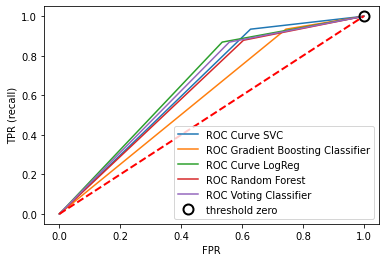

In [104]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_svc)
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, pred_gbc)
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, log_reg_pred)
fpr_ranfo, tpr_ranfo, thresholds_ranfo = roc_curve(y_test, rf_pred)
fpr_vc, tpr_vc, thresholds_vc = roc_curve(y_test, pred_vc)
# random_probs = [0 for i in range(len(y_test))]
# diagonal_fpr, diagonal_tpr = roc_curve(y_test, random_probs)


plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_gbc, tpr_gbc, label="ROC Gradient Boosting Classifier")
plt.plot(fpr_log_reg, tpr_log_reg, label="ROC Curve LogReg")
plt.plot(fpr_ranfo, tpr_ranfo, label="ROC Random Forest") 
plt.plot(fpr_vc, tpr_vc, label="ROC Voting Classifier")
plt.plot([0,1],[0,1], linestyle = '--', lw = 2, color = 'r')
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show()

### Model Selection

From the above metrics, Logistic Regression performed better than the rest of the models. Hence this model has been selected

### Predicting With Customers to Score Data

In [ ]:
test_data = pd.read_excel('customers-to-score.xlsx')
test_data.head(10)

In [ ]:
data1.isna().sum()

In [ ]:
test_data['Purpose'].value_counts()

In [ ]:
test_data['Purpose']=test_data['Purpose'].replace({'New car':'Not Home Related','Used car':'Not Home Related'})

In [ ]:
test_data.drop(['Foreign-Worker', 'Concurrent-Credits','Telephone','Duration-in-Current-address', 
           'Guarantors', 'Occupation','No-of-dependents'], axis=1, inplace=True) 

In [ ]:
test_data = pd.get_dummies(test_data, columns = ['Account-Balance', 'Payment-Status-of-Previous-Credit',
                                       'No-of-Credits-at-this-Bank','Purpose', 'Length-of-current-employment',
                                       'Value-Savings-Stocks' ], drop_first = True)

In [ ]:
test_data.head()

### Final Prediction

In [ ]:
#Logistic Regression
predict_Customer_Score = log_reg_final.predict(test_data)

In [ ]:
predict_Customer_Score = pd.DataFrame(predict_Customer_Score) #change to Dataframe

In [ ]:
predict_Customer_Score.value_counts()

In conclusion, the best model for predicting customers who are creditworthy and non-creditworthy in this project is 
Logistic Regression and it predicted that 406 customers are creditworthy while 94 are not.